{'C': 10}
The accuracy of the model is: 0.9502369668246445


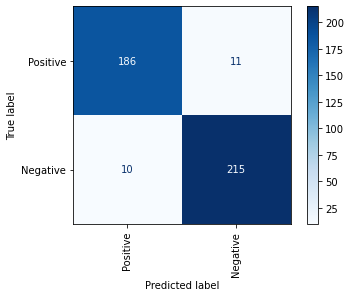

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],}

#(2)KNN
#model=KNeighborsClassifier()
#param_grid = {
#'n_neighbors': [3, 5, 7, 9],
#'weights': ['uniform', 'distance']
#}

#(3)RF
#model = RandomForestClassifier(random_state=0)
#param_grid = {
#'n_estimators': [100, 200, 300],
#'max_depth': [None, 10, 20, 30],
#'min_samples_split': [2, 5, 10],
#'min_samples_leaf': [1, 2, 4]
#}

#(4)XGBoost
# model =  XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5]
# }


#(5)SVM
#model= SVC(probability=True)

#this is an example to use the grid search to find the best parameter for SVM model
#param_grid` specifies the hyperparameter grid to search over： kernel types ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,2000],}
#param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

#(6)Naïve Bayes models
# model=BernoulliNB()
# param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

In [ ]:
# Here you change the reviews
text = 'Adayala road is clear'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

{'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2}
The accuracy of the model is: 0.9691943127962085


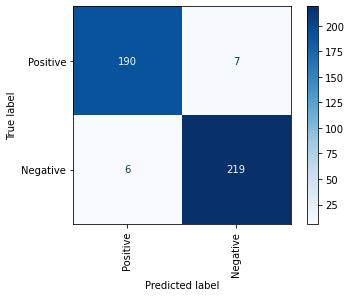

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR
#model = LogisticRegression(max_iter=1000, random_state=0)
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],}

#(2)KNN
#model=KNeighborsClassifier()
#param_grid = {
#'n_neighbors': [3, 5, 7, 9],
#'weights': ['uniform', 'distance']
#}

#(3)RF
#model = RandomForestClassifier(random_state=0)
#param_grid = {
#'n_estimators': [100, 200, 300],
#'max_depth': [None, 10, 20, 30],
#'min_samples_split': [2, 5, 10],
#'min_samples_leaf': [1, 2, 4]
#}

#(4)XGBoost
model =  XGBClassifier()
param_grid = {
'learning_rate': [0.01, 0.1, 0.2],
'n_estimators': range(100, 300, 10),
'max_depth': [3, 4, 5]
}


#(5)SVM
#model= SVC(probability=True)

#this is an example to use the grid search to find the best parameter for SVM model
#param_grid` specifies the hyperparameter grid to search over： kernel types ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
#param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}
#(6)Naïve Bayes models
#model=BernoulliNB()
#param_grid = {'alpha':[0.1, 0.5, 1]}

# Create a Random Search CV object with cross-validation and scoring
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=0)

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
random_search.fit(x_train, y_train)

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
#grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = random_search.best_params_
print(best_params)
best_score = random_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = random_search.best_estimator_



#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))